#### 통계청 출생아수 데이터 분석 
##### - 통계청 웹사이트에서 '인구동향조사: 출생아수(시도/시/군/구) 항목 조회'
##### - 항목 = 계/남자/여자, 시군구별 = level 1, 시점 = 1997.1월 ~ 2018.12월로 조회한 후 csv파일로 다운로드 
###### - http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&vw_cd=MT_GTITLE01&list_id=101&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01

In [55]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',  palette="pastel" )

####한글폰트, 차트의 음수축을 사용하기 위해 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

####  Step 1. 데이터 프레임 만들기 
#####  - raw data를 분석하기 좋은 형태로 변환한다. 

In [56]:
df_kosis = pd.read_csv('출생아수_시도_시_군_구__20200719173030.csv', encoding = 'cp949')
print(df_kosis.shape) 
df_kosis.head()

(19, 793)


,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2018. 09.2,2018. 10,2018. 10.1,2018. 10.2,2018. 11,2018. 11.1,2018. 11.2,2018. 12,2018. 12.1,2018. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,12557,26474,13601,12873,25301,13014,12287,22767,11686,11081
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2247,4689,2466,2223,4571,2369,2202,4110,2145,1965
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,713,1525,792,733,1439,732,707,1285,629,656
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,537,1151,587,564,1067,543,524,1002,525,477


##### <font color = yellow> * 원본이 피봇테이블 형태이다. 분석하기 좋은 tidy data 형태로 변환하자 </font>
##### <font color = yellow> * 참조: https://partrita.github.io/posts/tidy-data/ </font>

In [57]:
#### tidy data로 변환하기 위해, melt 함수 적용 (인덱스는 '시군구별')

df = df_kosis.melt(id_vars = '시군구별')

print(df.shape)
df

(15048, 3)


,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
...,...,...,...
15043,전라북도,2018. 12.2,312
15044,전라남도,2018. 12.2,392
15045,경상북도,2018. 12.2,537
15046,경상남도,2018. 12.2,696


In [58]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [59]:
#### 여기서 '시군구별'은 필요없는 항목이므로 제거한다. 
df = df[df['시군구별'] != '시군구별'].copy()
print(df.shape)
df

(14256, 3)


,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
...,...,...,...
15043,전라북도,2018. 12.2,312
15044,전라남도,2018. 12.2,392
15045,경상북도,2018. 12.2,537
15046,경상남도,2018. 12.2,696


####  Step 2. 데이터 전처리 하기 
#####  - 연도와 월, 남/여/전체를 구분해 주자 

In [60]:
#### variable컬럼에 연도, 월, 성별이 함께 들어있다. 구분해 주자 
print(df['variable'])

#### '.'을 기준으로 구분하고, expand = T 옵션으로 데이터프레임으로 출력한다. 
df['variable'].str.split('.', expand = True)

1          1997. 01
2          1997. 01
3          1997. 01
4          1997. 01
5          1997. 01
            ...    
15043    2018. 12.2
15044    2018. 12.2
15045    2018. 12.2
15046    2018. 12.2
15047    2018. 12.2
Name: variable, Length: 14256, dtype: object


,0,1,2
1,1997,01,None
2,1997,01,None
3,1997,01,None
4,1997,01,None
5,1997,01,None
...,...,...,...
15043,2018,12,2
15044,2018,12,2
15045,2018,12,2
15046,2018,12,2


In [61]:
df['연도'] = df['variable'].str.split('.', expand = True)[0]
df['월'] = df['variable'].str.split('.', expand = True)[1]
df['성별'] = df['variable'].str.split('.', expand = True)[2]
df

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None
...,...,...,...,...,...,...
15043,전라북도,2018. 12.2,312,2018,12,2
15044,전라남도,2018. 12.2,392,2018,12,2
15045,경상북도,2018. 12.2,537,2018,12,2
15046,경상남도,2018. 12.2,696,2018,12,2


In [62]:
#### 남여 합계값이 결측치로 인식되어 있다. 전체로 바꿔주자 
#### 1은 남자, 2는 여자를 의미한다. 알아보기 쉽게 바꿔주자 
#### 다른 컬럼명도 바꿔주자 

df['성별'] = df['성별'].fillna('전체')
df['성별'] = df['성별'].replace('1', '남').replace('2', '여')
df = df.rename(columns = {'variable' : '기간', 'value': '출생아수' })
df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체
...,...,...,...,...,...,...
15043,전라북도,2018. 12.2,312,2018,12,여
15044,전라남도,2018. 12.2,392,2018,12,여
15045,경상북도,2018. 12.2,537,2018,12,여
15046,경상남도,2018. 12.2,696,2018,12,여


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14256 entries, 1 to 15047
Data columns (total 6 columns):
시군구별    14256 non-null object
기간      14256 non-null object
출생아수    13716 non-null object
연도      14256 non-null object
월       14256 non-null object
성별      14256 non-null object
dtypes: object(6)
memory usage: 779.6+ KB


In [78]:
#### 출생아수가 문자 타입이며, 0인 경우 -로 입력되어 있다. 실수 형태로 바꿔주자 
#### 결측치(Nan)은 float 타입이다. 따라서 정수 타입으로 변경하면 에러가 발생한다. 
df['출생아수'] = df['출생아수'].replace('-', np.nan)
df['출생아수'] = df['출생아수'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14256 entries, 1 to 15047
Data columns (total 6 columns):
시군구별    14256 non-null object
기간      14256 non-null object
출생아수    13716 non-null float64
연도      14256 non-null object
월       14256 non-null object
성별      14256 non-null object
dtypes: float64(1), object(5)
memory usage: 779.6+ KB


####  Step 3. 데이터 시각화 1 
#####  - 전체 출생아수에 대한 분석을 해보자 

In [79]:
#### 우선 '지역 = 전국, 성별 = 전체'인 데이터만 추출한다  
df_all = df[(df['시군구별'] == '전국') & (df['성별'] == '전체')]
df_all

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체
...,...,...,...,...,...,...
14764,전국,2018. 08,27381.0,2018,08,전체
14821,전국,2018. 09,26066.0,2018,09,전체
14878,전국,2018. 10,26474.0,2018,10,전체
14935,전국,2018. 11,25301.0,2018,11,전체


In [81]:
#### 불필요한 컬럼을 제거하고, 연도와 월을 인덱스로 지정한다. 
df_all = df_all[['연도', '월', '출생아수']].copy()
df_all = df_all.set_index(['연도', '월'])
df_all

출생아수
연도   월           
1997  01  63268.0
      02  58144.0
      03  62160.0
      04  56949.0
      05  55270.0
...           ...
2018  08  27381.0
      09  26066.0
      10  26474.0
      11  25301.0
      12  22767.0

[264 rows x 1 columns]

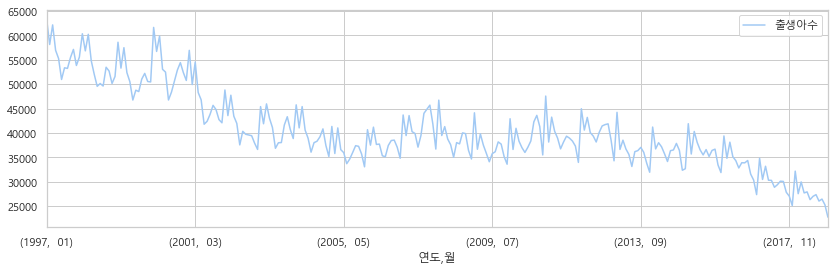

In [83]:
df_all.plot(figsize = (14,4))

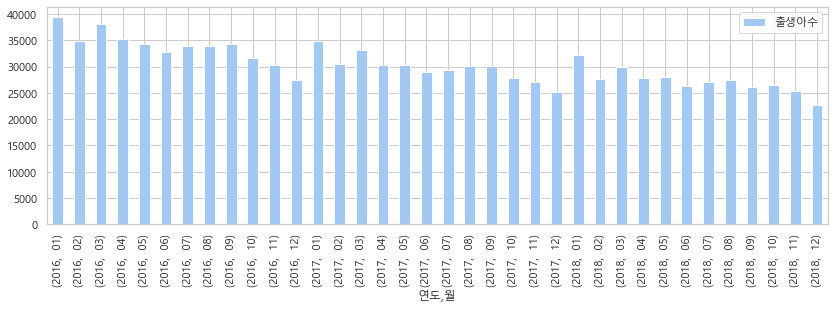

In [85]:
### slicing을 적용하여, 최근 3년만 그려보자 
df_all[-36:].plot.bar(figsize = (14,4))

##### <font color = yellow> -> 전체적으로 출생아수는 감소 추세 </font>
##### <font color = yellow> -> 1월과 3월에 출생아수가 많고, 12월은 가장 적다 </font>
##### <font color = yellow> -> 2월이 날짜가 적다는 점을 감안하면, 주로 1분기에 많이 출산하며 4분기는 피하는 경향이 있다.  </font>

####  Step 3. 데이터 시각화 2 
#####  - pandas의 plot()은 index를 x축으로 하는 단순한 차트만드는데 적합하다. 
#####  - seaborn을 사용해서 보다 나은 시각화를 해보자 

In [90]:
df_all_2 = df[(df['시군구별'] == '전국') & (df['성별'] == '전체')]
df_all_2 = df_all_2[['연도', '월', '출생아수']].copy()

df_all_2

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0
...,...,...,...
14764,2018,08,27381.0
14821,2018,09,26066.0
14878,2018,10,26474.0
14935,2018,11,25301.0


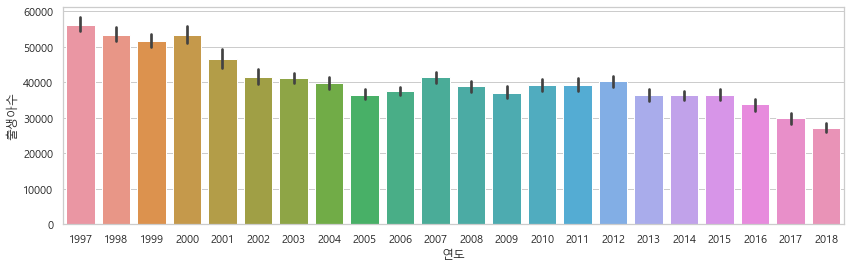

In [93]:
plt.figure(figsize = (14,4))
sns.barplot(data = df_all_2, x='연도', y='출생아수')

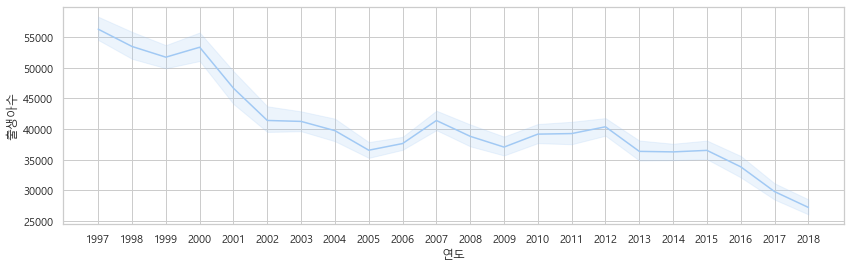

In [100]:
plt.figure(figsize = (14,4))
sns.lineplot(data = df_all_2, x='연도', y='출생아수')

##### <font color = yellow> *주의!! : seaborn 차트에서 표시되는 값은 해당연도 12개월의 "평균" 값이다. </font>

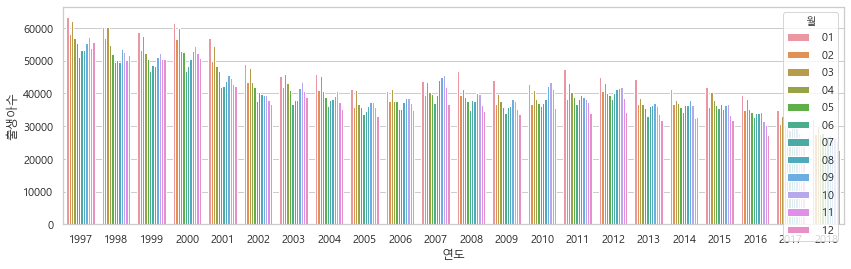

In [103]:
plt.figure(figsize = (14,4))
sns.barplot(data = df_all_2, x='연도', y='출생아수', hue = '월')

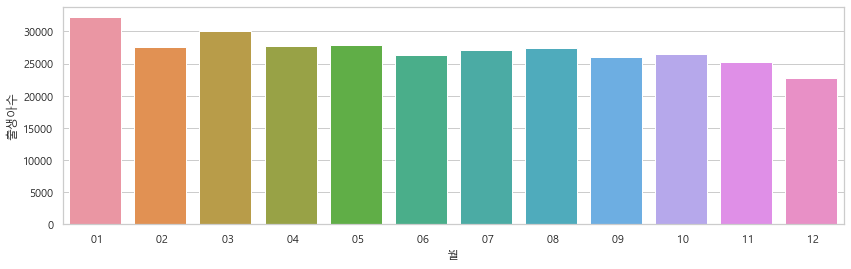

In [106]:
df_all_2018 = df_all_2[df_all_2['연도'] == '2018']
plt.figure(figsize = (14,4))
sns.barplot(data = df_all_2018, x='월', y='출생아수')

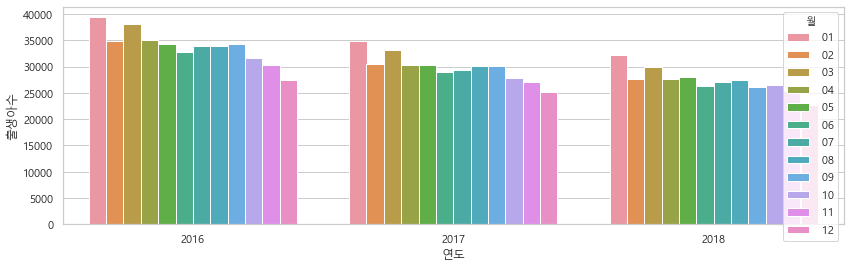

In [117]:
df_all_resent3year = df_all_2[df_all_2['연도'] >= '2016']
plt.figure(figsize = (14,4))
sns.barplot(data = df_all_resent3year, x='연도', y='출생아수', hue = '월')

####  Step 4. 지역별 분석 
#####  - 전체적인 출생아수 감소 추세에도 불구, 오히려 증가하는 도시가 있다. 

In [125]:
df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
...,...,...,...,...,...,...
15043,전라북도,2018. 12.2,312.0,2018,12,여
15044,전라남도,2018. 12.2,392.0,2018,12,여
15045,경상북도,2018. 12.2,537.0,2018,12,여
15046,경상남도,2018. 12.2,696.0,2018,12,여


In [134]:
#### 지역이 '전국'인 것은 필요없다. 
df_local = df[df['시군구별'] != '전국'].copy()
df_local

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체
...,...,...,...,...,...,...
15043,전라북도,2018. 12.2,312.0,2018,12,여
15044,전라남도,2018. 12.2,392.0,2018,12,여
15045,경상북도,2018. 12.2,537.0,2018,12,여
15046,경상남도,2018. 12.2,696.0,2018,12,여


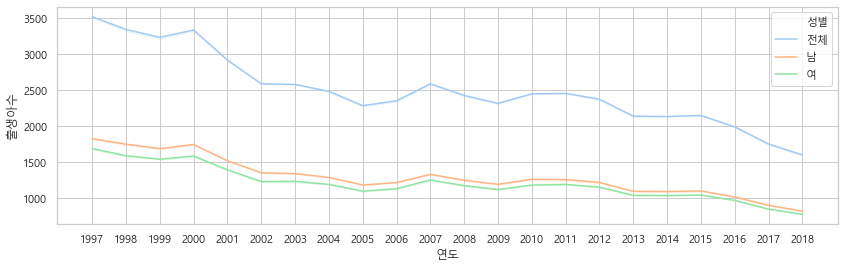

In [137]:
plt.figure(figsize = (14,4))
sns.lineplot(data = df_local, x='연도', y='출생아수', hue = '성별', ci=0 )

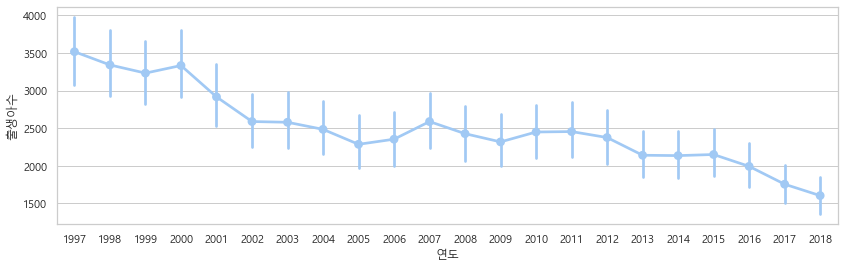

In [139]:
#### 남여구분 없이 성별이 전체인 것만 가져와, 시각화 해보자 
df_local_all = df_local[df_local['성별'] == '전체'].copy()

plt.figure(figsize = (14,4))
sns.pointplot(data = df_local_all, x='연도', y='출생아수')

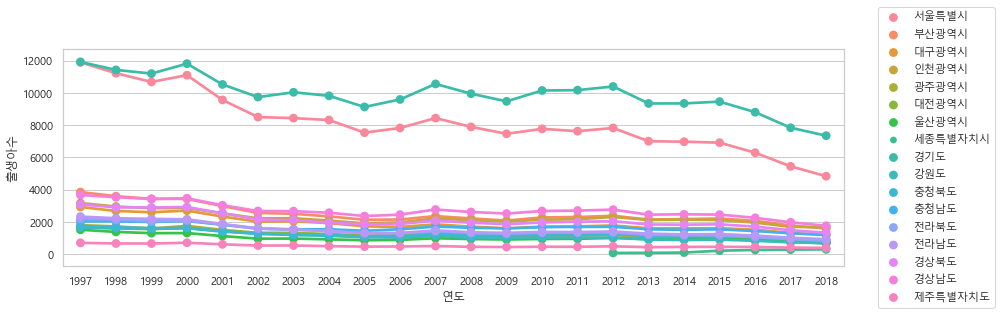

In [149]:
plt.figure(figsize = (14,4))
sns.pointplot(data = df_local_all, x='연도', y='출생아수', hue='시군구별', ci=None)

#### 범례를 보기좋게 오른쪽으로 빼자 
plt.legend(loc = 'right', bbox_to_anchor = (1.2, 0.5), ncol = 1)

##### <font color = yellow> * 출생아수 절대값이 많은 경기,서울과 특이하게 출생아 증가 추세인 세종시만 분석해보자  </font>

In [150]:
df_local_3city = df_local_all[df_local_all['시군구별'].isin(['서울특별시', '경기도', '세종특별자치시'])]
df_local_3city

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
9,세종특별자치시,1997. 01,NaN,1997,01,전체
10,경기도,1997. 01,13440.0,1997,01,전체
59,서울특별시,1997. 02,12239.0,1997,02,전체
66,세종특별자치시,1997. 02,NaN,1997,02,전체
...,...,...,...,...,...,...
14943,세종특별자치시,2018. 11,337.0,2018,11,전체
14944,경기도,2018. 11,6763.0,2018,11,전체
14993,서울특별시,2018. 12,4110.0,2018,12,전체
15000,세종특별자치시,2018. 12,285.0,2018,12,전체


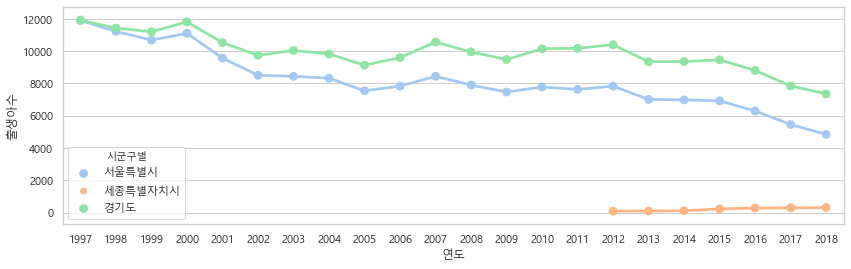

In [154]:
plt.figure(figsize = (14,4))
sns.pointplot(data = df_local_3city, x='연도', y='출생아수', hue='시군구별', ci=None)

In [155]:
#### 세종시만 따로 분석해보자 
df_sejong = df_local_3city[df_local_3city['시군구별'] == '세종특별자치시']
df_sejong

,시군구별,기간,출생아수,연도,월,성별
9,세종특별자치시,1997. 01,NaN,1997,01,전체
66,세종특별자치시,1997. 02,NaN,1997,02,전체
123,세종특별자치시,1997. 03,NaN,1997,03,전체
180,세종특별자치시,1997. 04,NaN,1997,04,전체
237,세종특별자치시,1997. 05,NaN,1997,05,전체
...,...,...,...,...,...,...
14772,세종특별자치시,2018. 08,280.0,2018,08,전체
14829,세종특별자치시,2018. 09,293.0,2018,09,전체
14886,세종특별자치시,2018. 10,309.0,2018,10,전체
14943,세종특별자치시,2018. 11,337.0,2018,11,전체


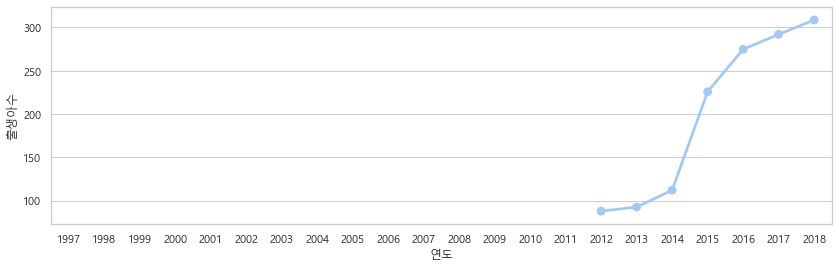

In [156]:
plt.figure(figsize = (14,4))
sns.pointplot(data = df_sejong, x='연도', y='출생아수', ci=None)

In [157]:
#### 2012년 이후부터만 그리자 (결측치 제거)
df_sejong_2 = df_local_3city[df_local_3city['시군구별'] == '세종특별자치시'].dropna(how='any')
df_sejong_2

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012. 01,73.0,2012,01,전체
10326,세종특별자치시,2012. 02,74.0,2012,02,전체
10383,세종특별자치시,2012. 03,92.0,2012,03,전체
10440,세종특별자치시,2012. 04,84.0,2012,04,전체
10497,세종특별자치시,2012. 05,72.0,2012,05,전체
...,...,...,...,...,...,...
14772,세종특별자치시,2018. 08,280.0,2018,08,전체
14829,세종특별자치시,2018. 09,293.0,2018,09,전체
14886,세종특별자치시,2018. 10,309.0,2018,10,전체
14943,세종특별자치시,2018. 11,337.0,2018,11,전체


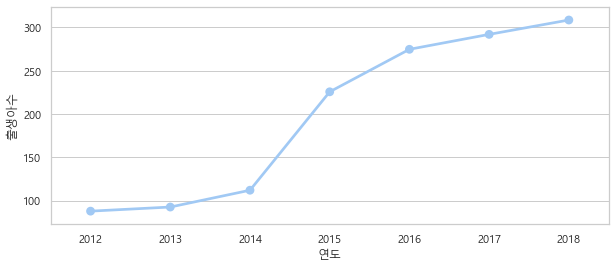

In [164]:
plt.figure(figsize = (10,4))
sns.pointplot(data = df_sejong_2, x='연도', y='출생아수', ci=None)

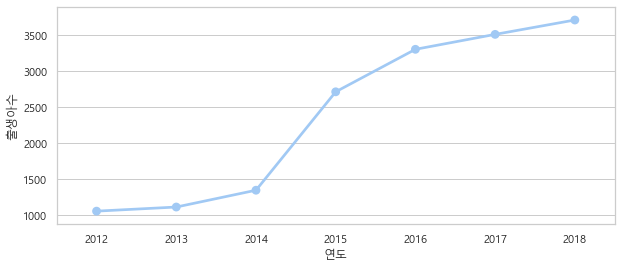

In [165]:
#### 연도별 월 평균 출생아수가 아니라, 해당연도 총합을 표현하자 
#### estimator 옵션에 Numpy의 sum 함수를 적용한다.

plt.figure(figsize = (10,4))
sns.pointplot(data = df_sejong_2, x='연도', y='출생아수', ci=None, estimator = np.sum)